# Black Friday Sales Prediction

## About the data

This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem.The idea and dataset is taken from AnalyticsVidhya where the project is a part of a hackathon.

## Data Description

## Import Libraries

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import dataset

In [130]:
sales = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [131]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [132]:
#for submission

submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

In [133]:
submission

,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


## Data exploration

In [134]:
sales.shape

(550068, 12)

In [135]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables.

Looking into the summary statistics for these 7numercal features

In [136]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


There are 12 features, looking into each of these features:

User ID: Each user has been provided a unique ID. Lets see how many unique users we have in our dataset

In [137]:
sales.User_ID.nunique()

5891

There are 5891 unique users in our dataset and none of the value in this feature is null

Product_ID: Each product that is available for sales has a specific/ unique product id associated with it. Lets look into the number of unique products available for sale.

In [138]:
sales.Product_ID.nunique()

3631

So there are a total of 3631 products available for sales.

Gender: Gender is a categorical variables with 2 categries: Male(M) and Female(F).

In [139]:
sales.Gender.value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

There are no null values in this feature and Males constitute 75% of the data.

In [140]:
sales.Age.value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

The age is divide in 7 categories i.e 0-17,18-25,26-35,36-45,46-50,51-55,55+ . The bins size here is varing.

Occupation: The Occupation number is the ID number of occupation type of each customer. We can see that around 21 different occupations exist.

In [141]:
sales.Occupation.nunique()

21

City_Category : The city has been categorised into 3 categories i.e A,B,C.

In [142]:
sales.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

Stay_In_Current_City_Years : This depects the numbers of year from which a person is residing in that particular city. It has been divided into 5 categories

In [143]:
sales.Stay_In_Current_City_Years.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

Marital_Status: This features shows if a person is married or not.

In [144]:
sales.Marital_Status.value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

The products have been categorised into three categories with represent three different features:

Product_Category_1

Product_Category_2

Product_Category_3

Purchase: This is our final feature which is our dependent variables whose value we want to predict, the purchase amount. It is a contionous variable so this makes it a regression problem.

## Missing data

In [145]:
# lets combine the data for data prep

test['Purchase']=np.nan
sales['data']='train'
test['data']='test'
test=test[sales.columns]
combined=pd.concat([sales,test],axis=0)

In [146]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


In [147]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [148]:
sales.isna().sum().sort_values(ascending=False)

Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
data                               0
dtype: int64

Here we can see that there are 2 features which contain the missing values i.e Product_Category_2 and Product_Category_3.

In [149]:
#percent of missing data relevant to all data
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent

Product_Category_3            0.696727
Product_Category_2            0.315666
User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
data                          0.000000
dtype: float64

The feature Product_Category_3 has 70% data missing so imputing this much data is not feasible , so it is better to drop this feature

In [150]:
combined.drop('Product_Category_3',axis=1,inplace=True)

The feature Product_Category_2 has 30% data missing so we can impute values into this using an appromiate method.

In [151]:
combined.Product_Category_2.value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.

In [152]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [153]:
combined.Product_Category_2.value_counts()

8.0     133050
14.0    115077
2.0     102734
16.0     89803
15.0     78979
5.0      54115
4.0      53708
6.0      34236
11.0     29395
17.0     27818
13.0     22042
9.0      11901
12.0     11316
10.0      6378
3.0       6006
18.0      5874
7.0       1235
Name: Product_Category_2, dtype: int64

In [154]:
combined.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

## Exploratory Data Analysis

In [155]:
#using the train data part from combined dataset for eda

sales_1 = combined[combined['data']=='train']

### Univariate Analysis:

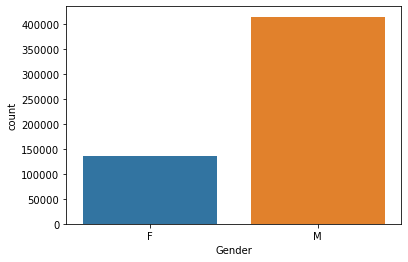

In [156]:
sns.countplot(sales_1['Gender'])
plt.show()

The graph shows that there are almost 3 times more male customers than female customers.

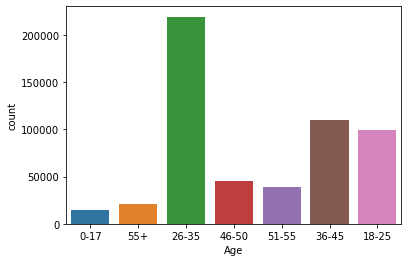

In [157]:
sns.countplot(sales_1['Age'])
plt.show()

The graph shows that the majority of the customers that purchase things during the sales season mainly belong to the age group of 26-35 and 36-45.

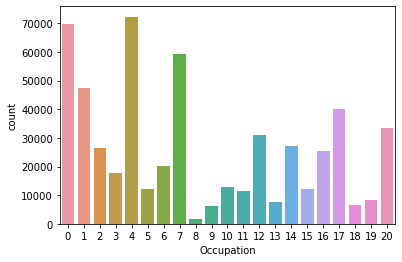

In [158]:
sns.countplot(sales_1['Occupation'])
plt.show()

The graph shows that top three Occupations with the majority of buyers is 4,0,7.

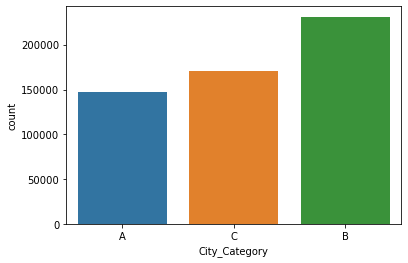

In [159]:
sns.countplot(sales_1['City_Category'])
plt.show()

The graph shows that people from city B buy majorly during the sale

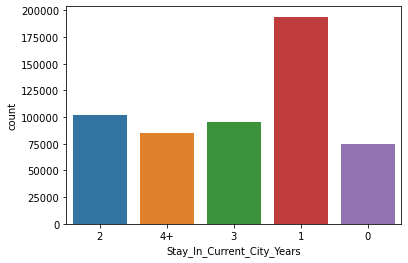

In [160]:
sns.countplot(sales_1['Stay_In_Current_City_Years'])
plt.show()

The graph shows that majority people buying during sales have lived in the current city for an year.

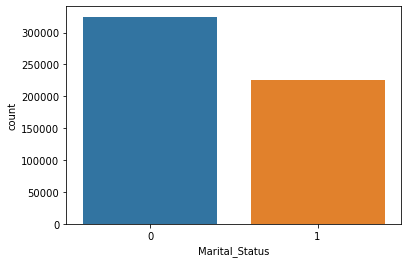

In [161]:
sns.countplot(sales_1['Marital_Status'])
plt.show()

The graphs shows that single people tend to buy more things during sales.

## Bivariate Analysis / Multivariate Analysis:

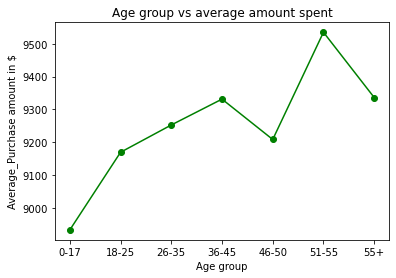

In [162]:
# Avearge amount spend by different age groups

data = sales_1.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()

The average amount spend by age group 51-55 is most during the festive season sales.

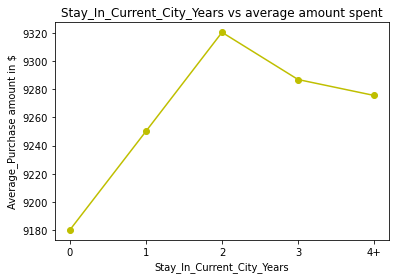

In [163]:
# Avearge amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

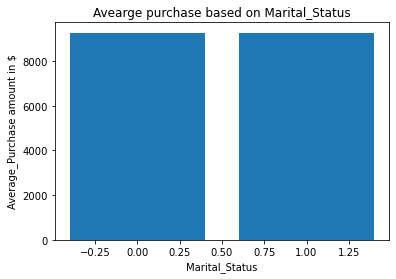

In [164]:
# Avearge purchase based on Marital_Status

data = sales_1.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()


Purchasers who married or not, have almost same average of purchase.

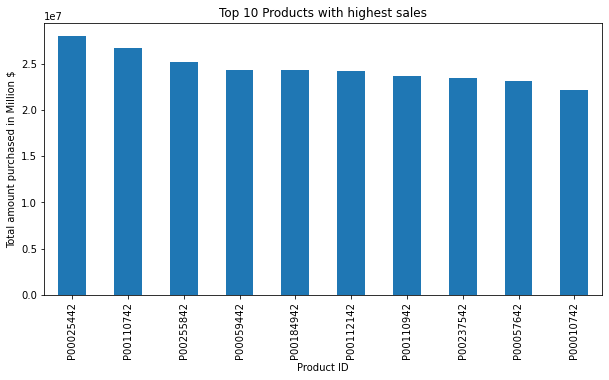

In [165]:
# Top 10 products which made the highest sales

data = sales_1.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

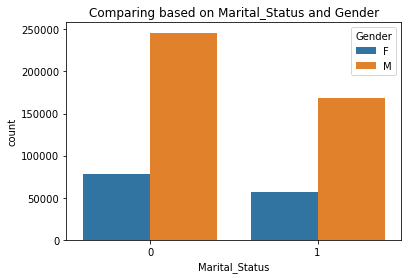

In [166]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average.

Products that are most purchased by each of the age group:

In [167]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

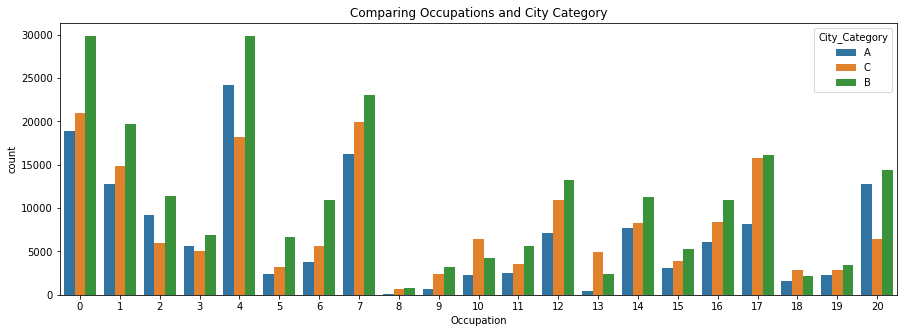

In [168]:
#Occupations and City Category

plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

People from Occupation 4,0,7 are buying the most and most of the people from these occupations belong to City_Category B.

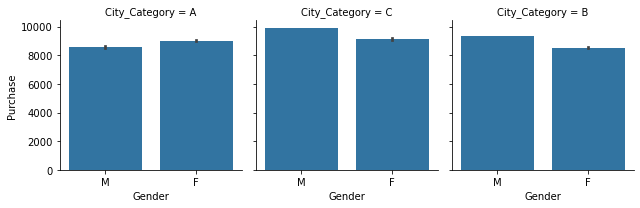

In [169]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to puchase more than men.

## Data preprocessing.

In [170]:
# for datapreprocessing again working with the combined dataset
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,15.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,14.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,15.0,7969.0,train


1.User_ID and Product_ID:

In [171]:
# User_ID data preprocess. e.g. 1000002 -> 2

combined['User_ID'] = combined['User_ID'] - 1000000

# Product_ID preprocess e.g. P00069042 -> 69042

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

#object to int
combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [172]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


2.Product_Category_2 :

All the unique values in product category 2 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [173]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64')

In [174]:
# features with datatype object

cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

3.Stay_In_Current_City_Years

For Stay in current city years we need to convert the object datatype to int. It contains a category which has '4+' that needs to be altered.

In [175]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

4.Gender:

Gender 'F' for female are represented by the value fo 0.

Gender 'M' for male are represented by the value fo 1.

In [176]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int)

5.Age

In [177]:
# Modify age column

combined['Age'] = combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined['Age'].value_counts()

31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: Age, dtype: int64

6.City_Category : dummy variables for this feature

In [178]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)

In [179]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,15,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,14,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,15,7969.0,train,0,1


In [180]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(1),

In [181]:
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,15,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,14,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,15,7969.0,train,0,1


In [182]:
#splitting the data back into train and test as it was already provided

sales = combined[combined['data']=='train']
del sales['data']
test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

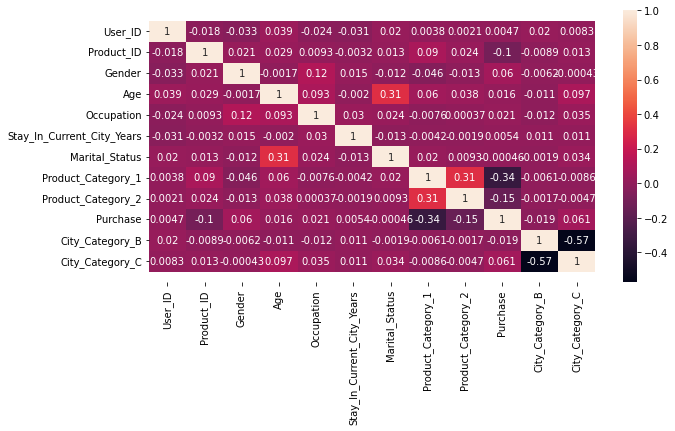

In [183]:
#Heatmap to show the correlation between various variables of the train data set

plt.figure(figsize=(10, 5))
cor = sales.corr()
ax = sns.heatmap(cor,annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


The variables which show a significant correlation in the data are:

1.Marital_status and Age

2.Product_Category_1 and Purchase

3.City_Category_B and City_category_A

## Model building

In [184]:
#splitting the data into X and y
X = sales.drop('Purchase',axis=1)
y = sales['Purchase']

#train test split for model building
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [185]:
#Linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train) # training the algorithm

# Getting the coefficients and intercept

print('coefficients:\n', lr.coef_)
print('\n intercept:', lr.intercept_)

coefficients:
 [ 1.50676051e-02 -3.71031298e-03  5.35706747e+02  1.49740693e+01
  6.83457000e+00  1.25765080e+01 -6.05041539e+01 -4.10865642e+02
 -4.64540490e+01  1.79761704e+02  6.99818664e+02]

 intercept: 11266.49654247417


In [186]:
#Predicting on the test data

y_pred = lr.predict(X_test)

from sklearn import metrics

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.13223233692778624
rmse: 4684.996453385466


In [187]:
# Ridge Regression

from sklearn.linear_model import Ridge

RR = Ridge(alpha=0.05,normalize=True)
RR.fit(X_train, y_train)

y_pred = RR.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 4685.54669001201


## Decision Tree

In [188]:
# Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2735.998553274134


In [189]:
#Decision Tree 2

DT2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)

DT2.fit(X_train, y_train)

y_pred = DT2.predict(X_test)

print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

rmse: 2884.4735501907207


## Random Forest Regressor

In [190]:
#Fitting the model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 3,max_depth=10,n_estimators=25)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6910077941504174
rmse: 2795.6403342877447


In [191]:
# another random forest

from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(random_state=3,max_depth=10,min_samples_split=500,oob_score=True)


rf3.fit(X_train,y_train)

y_pred = rf3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6885333480972113
rmse: 2806.811921914396


In [192]:
# random forest 4

rf4 = RandomForestRegressor(n_estimators=30,random_state=3,max_depth=15,min_samples_split=100,oob_score=True)


rf4.fit(X_train,y_train)

y_pred = rf4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7125158393239708
rmse: 2696.5873701999635


In [193]:
#XGBoost Model1
from xgboost import XGBRegressor


xgb1 = XGBRegressor(n_estimators=1000, learning_rate=0.05)

xgb1.fit(X_train,y_train)

y_pred = xgb1.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7361136125301322
rmse: 2583.544992467269


In [194]:
## XGBoost2
from xgboost import XGBRegressor

xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X_train,y_train)

y_pred = xgb2.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7486920629214626
rmse: 2521.219386344897


In [195]:
xgb2 = XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

xgb2.fit(X,y)
predict = xgb2.predict(test_input)

submission['Purchase'] = predict

submission.to_csv('Sample_Submission_XGB2.csv')

#score: 2522.743

In [197]:
## XGBoost3

xgb3 = XGBRegressor(n_estimators=6,max_depth=500)

xgb3.fit(X_train,y_train)

y_pred = xgb3.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6228365360098811
rmse: 3088.6759266561635


In [198]:
#XGBoost4

xgb4 = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb4.fit(X_train,y_train)

y_pred = xgb4.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7339580400801886
rmse: 2594.0754558933836


In [199]:
#XGBoost5
from xgboost import XGBRegressor

xgb5 = XGBRegressor(n_estimators=450,max_depth=8,learning_rate=0.076)

xgb5.fit(X_train,y_train)

y_pred = xgb5.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7442852801365247
rmse: 2543.228603697683


In [200]:
#XGBoost6
from xgboost import XGBRegressor

xgb6 = XGBRegressor(n_estimators=470,max_depth=9,learning_rate=0.06)

xgb6.fit(X_train,y_train)

y_pred = xgb6.predict(X_test)

print('r2_score:', metrics.r2_score(y_test,y_pred)) 
print('rmse:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.7466628781821589
rmse: 2531.3777086957602


## Conclusion
Comparing all the models, we conclude that the XGBRegressor model is the best model to be able to predict purchase amount from our dataset.

Parameters and score:

XGBRegressor(n_estimators=500,max_depth=10,learning_rate=0.05)

r2_score: 0.7466628781821589

rmse:2531.3777086957602

In [201]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.head()

,Actual,Predicted
41001,15228.0,13575.380859
16151,1088.0,960.772583
507262,16426.0,16369.493164
368698,12042.0,17701.302734
353782,8699.0,7004.935547


In [202]:
# Feature Importance

imp = pd.DataFrame(xgb2.feature_importances_,index=X.columns,columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
Product_Category_1,0.862691
Product_ID,0.027054
City_Category_C,0.023098
Product_Category_2,0.013622
User_ID,0.012006
Age,0.010626
City_Category_B,0.010435
Occupation,0.010292
Gender,0.010217
Marital_Status,0.010099


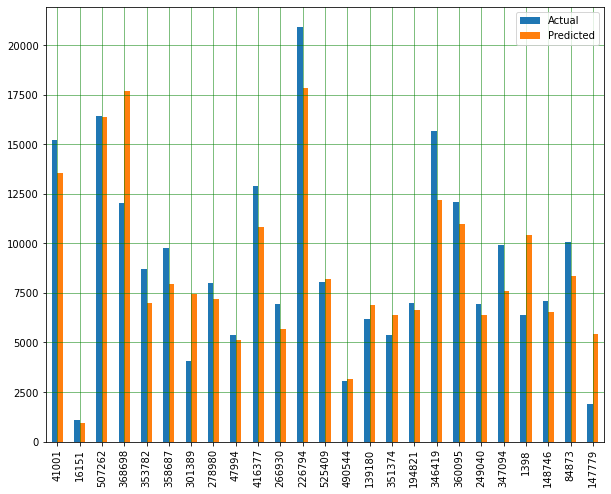

In [203]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

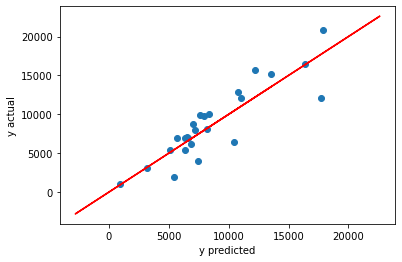

In [204]:
plt.scatter(df1.Predicted,df1.Actual)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()
